In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px 

default_figsize = (12.8, 4.8)

In [62]:
df_household = pd.read_csv("data/demog.csv")
df_spendings = pd.read_csv("data/spent_by_household.csv")

In [63]:
df_spent_and_demog=pd.merge(df_household, df_spendings, on='household_key', how='inner')

In [64]:
df_spent_and_demog.head()

,Unnamed: 0_x,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key,GENDER,...,Unnamed: 0_y,paid_meat,paid_food,number_of_active_weeks,avg_spending_per_week,paid_veggies,avg_spending_meat_per_week,ratio_spent_for_meat,avg_spending_veggies_per_week,ratio_spent_for_veggies
0,0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,NaN,...,0,380.95,2812.21,67,41.973284,292.81,5.685821,0.135463,4.370299,0.104121
1,1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,NaN,...,6,560.48,2034.38,48,42.382917,100.66,11.676667,0.275504,2.097083,0.049479
2,2,25-34,U,Under 35K,Unknown,2 Adults Kids,3,1,8,NaN,...,7,726.77,3122.27,69,45.250290,257.20,10.532899,0.232770,3.727536,0.082376
3,3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13,NaN,...,12,422.02,3821.40,81,47.177778,234.80,5.210123,0.110436,2.898765,0.061443
4,4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,Female,...,15,219.80,1060.74,55,19.286182,49.88,3.996364,0.207214,0.906909,0.047024


In [65]:
# Uncomment to get only singles
# df_spent_and_demog = df_spent_and_demog[df_spent_and_demog.HH_COMP_DESC.isin(["Single Male", "Single Female"])]

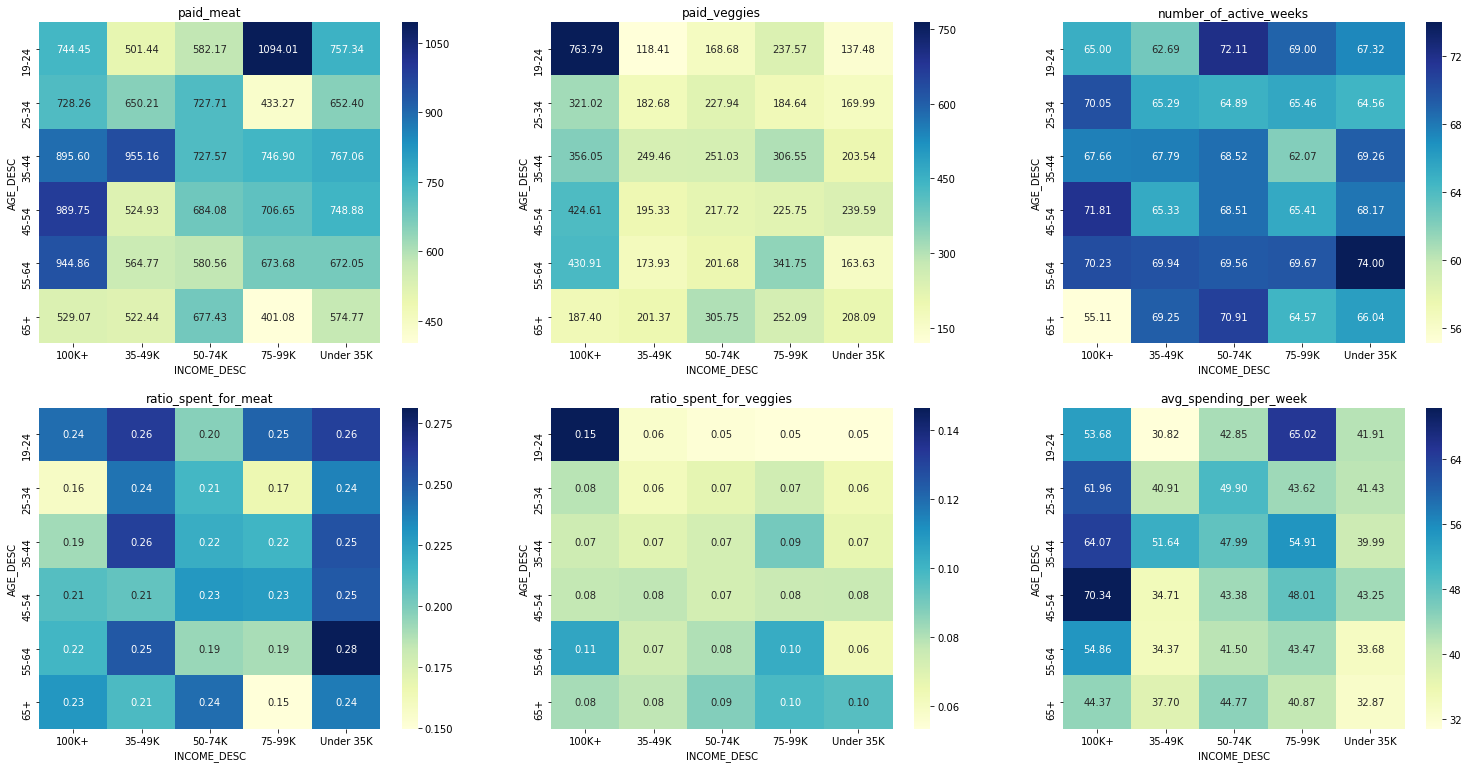

In [66]:
COLS_OF_INTEREST = [
    "paid_meat",
    "paid_veggies",
    "number_of_active_weeks",
    "ratio_spent_for_meat",
    "ratio_spent_for_veggies",
    "avg_spending_per_week",
]
KEY  = ('AGE_DESC', 'INCOME_DESC')

                    
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(26,13))

for i, col in enumerate(COLS_OF_INTEREST):
    
    df_dummy = df_spent_and_demog.groupby([KEY[0], KEY[1]]).agg({col: 'mean'})\
                                 .reset_index().pivot(index= KEY[0], columns= KEY[1], values=col)

    sns.heatmap(df_dummy, annot=True, fmt=".02f", annot_kws={"size": 10}, cmap="YlGnBu", ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(col)
    b, t = axes[i // 3, i % 3].set_ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    axes[i // 3, i % 3].set_ylim(b, t) # update the ylim(bottom, top) values